<a href="https://colab.research.google.com/github/duyguaran/graduation_thesis/blob/main/fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16064173801004994981, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11154422528
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6275530359717788134
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#training and testing data information
#some of the data has been uploaded for a now
import os, os.path
train_categories = []
train_samples = []
for i in os.listdir("/content/drive/MyDrive/graduation/fruits-360/Training/"):
    train_categories.append(i)
    train_samples.append(len(os.listdir("/content/drive/MyDrive/graduation/fruits-360/Training/"+ i)))

test_categories = []
test_samples = []
for i in os.listdir("/content/drive/MyDrive/graduation/fruits-360/Test/"):
    test_categories.append(i)
    test_samples.append(len(os.listdir("/content/drive/MyDrive/graduation/fruits-360/Test/"+i)))

    
print("Count of Fruits in Training set:", sum(train_samples))
print("Count of Fruits in Set set:", sum(test_samples))

Count of Fruits in Training set: 22953
Count of Fruits in Set set: 22708


In [6]:
import matplotlib.pyplot as plt

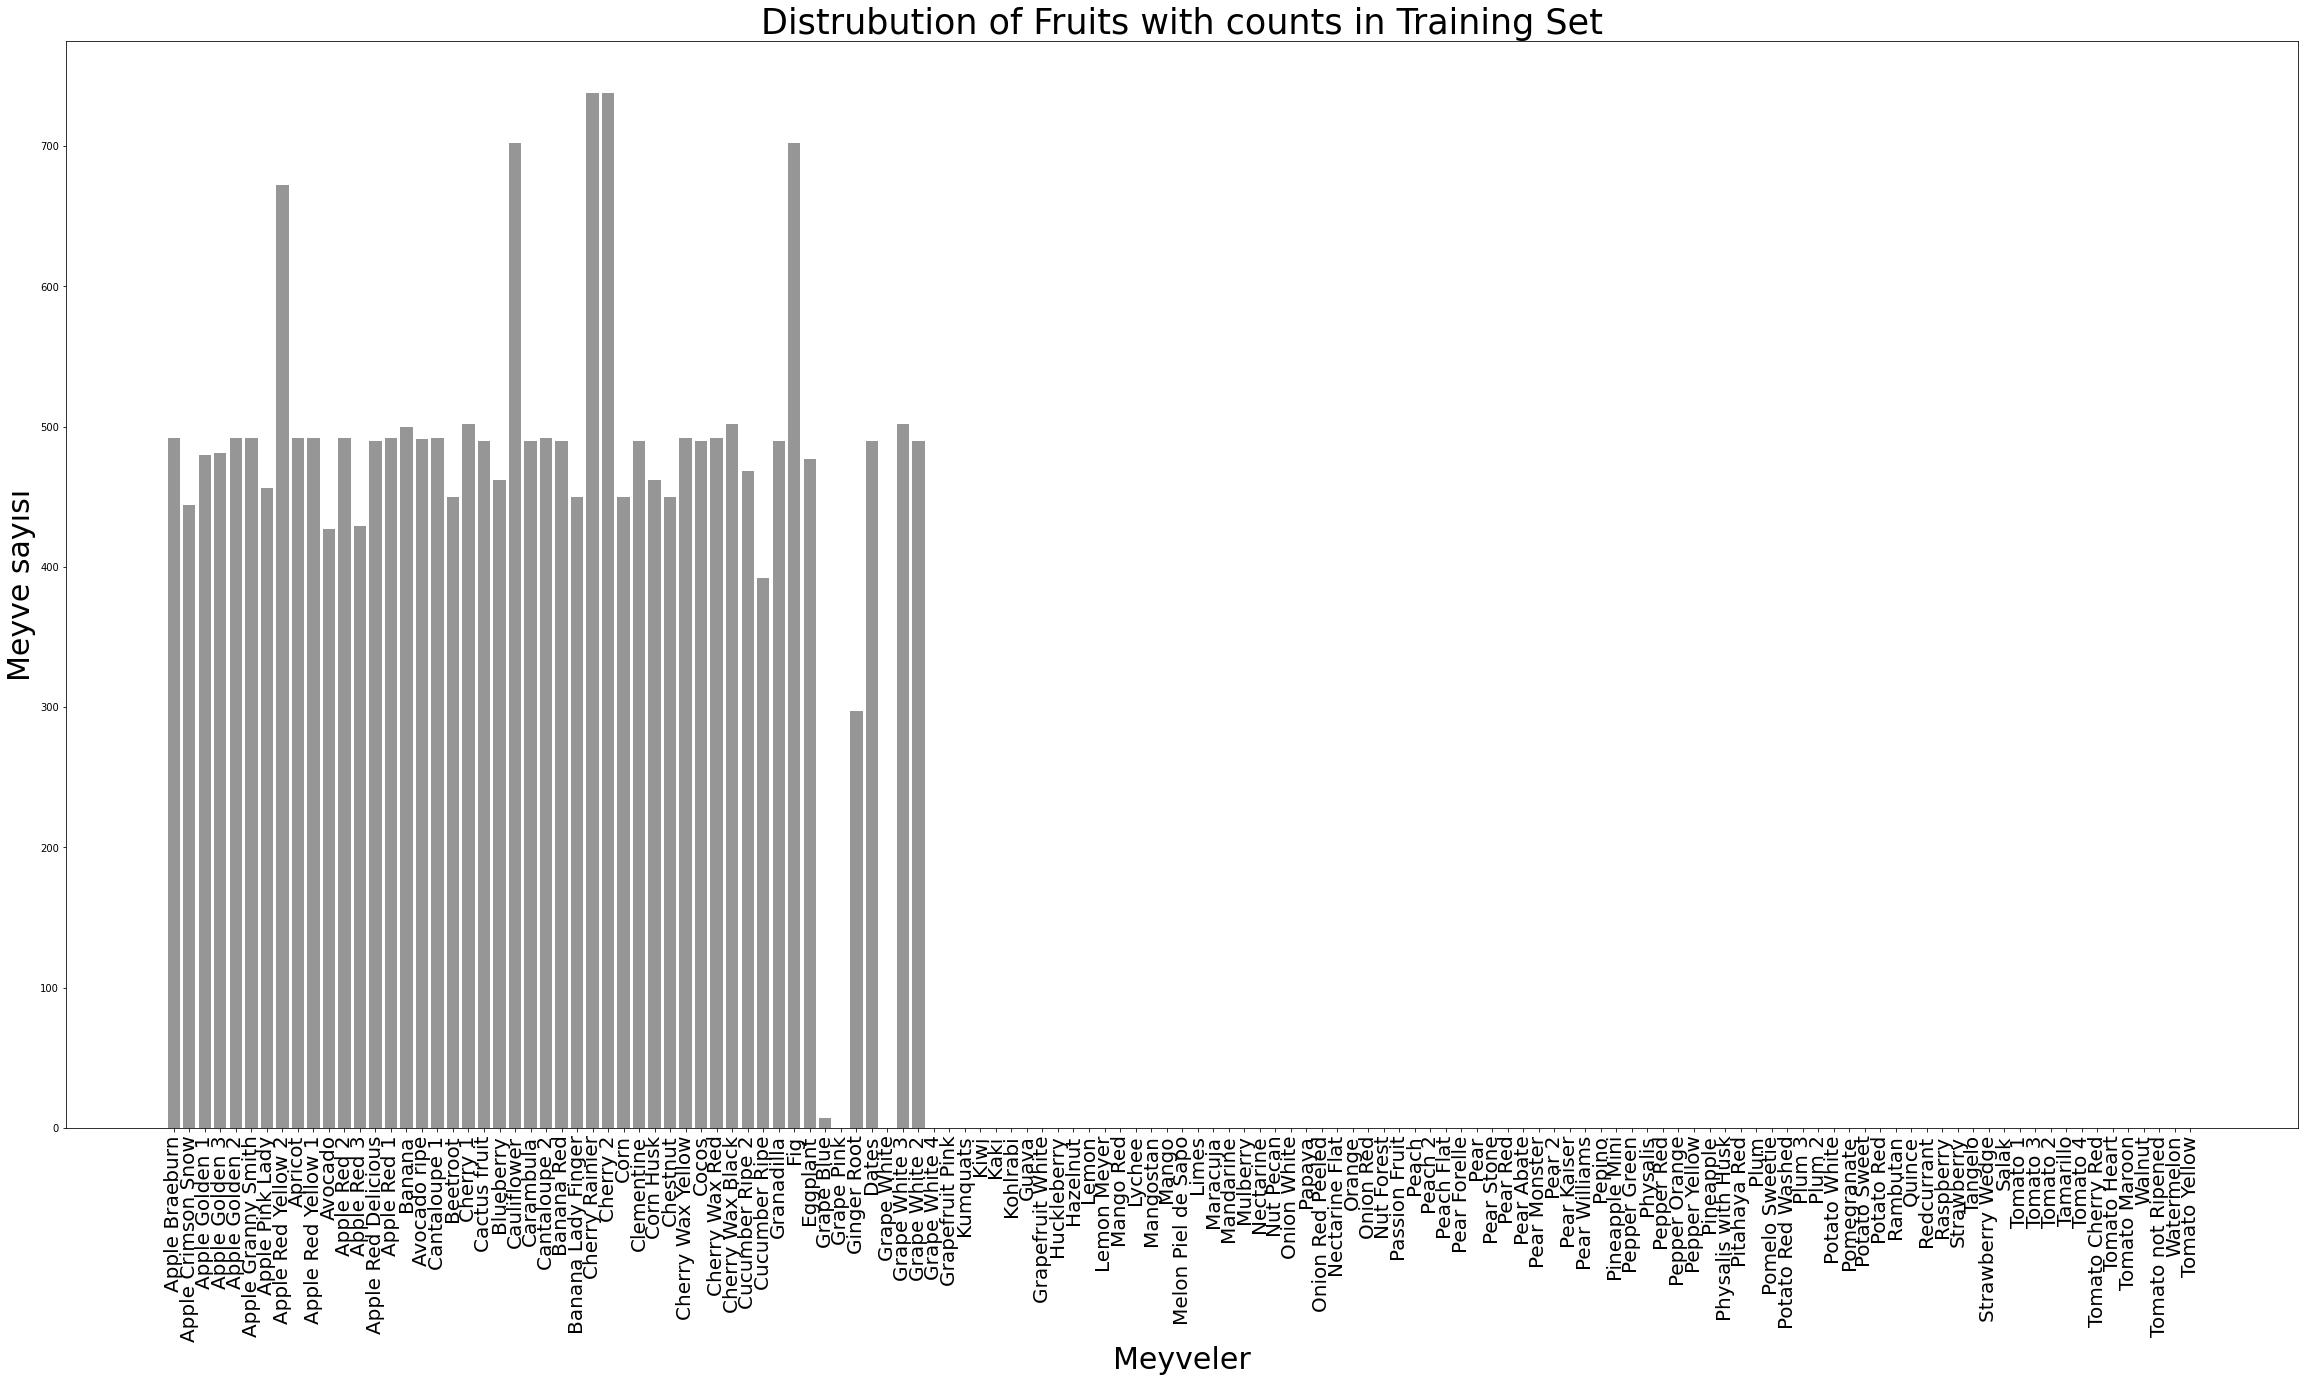

In [7]:
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 40
figure_size[1] = 20
plt.rcParams["figure.figsize"] = figure_size
index = np.arange(len(train_categories))
plt.bar(index, train_samples, color="#969696")
plt.xlabel('Meyveler', fontsize=30)
plt.ylabel('Meyve sayısı', fontsize=30)
plt.xticks(index, train_categories, fontsize=20, rotation=90)
plt.title('Distrubution of Fruits with counts in Training Set', fontsize=35)
plt.show() # distribution of uploaded training data

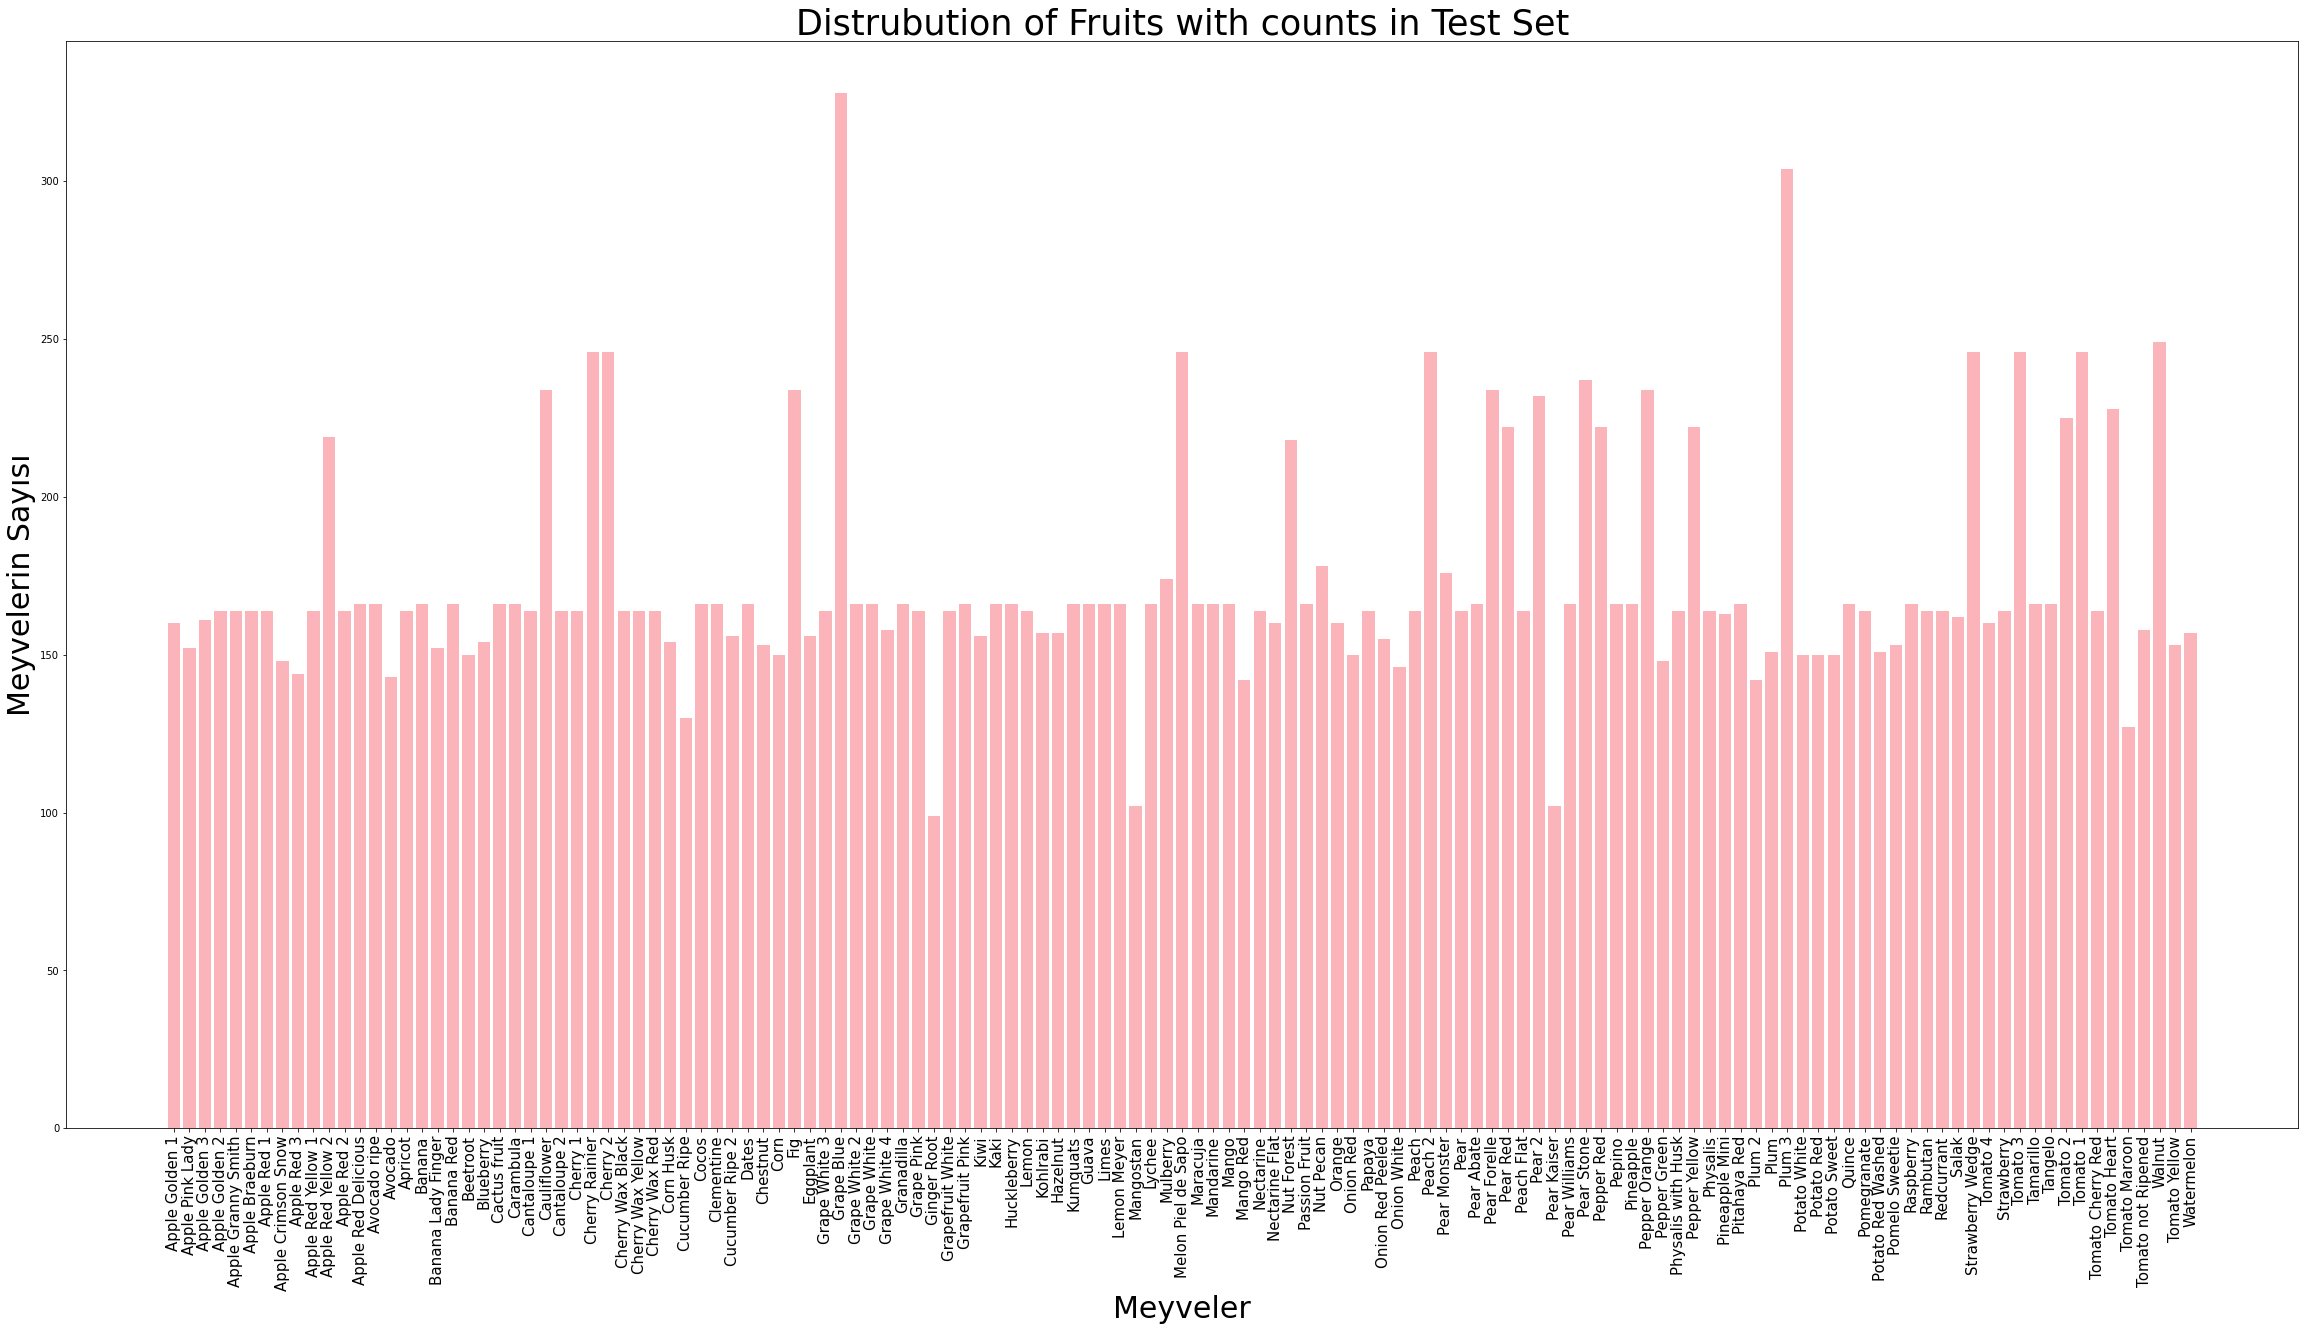

In [8]:
index2 = np.arange(len(test_categories))
plt.bar(index2, test_samples, color="#fbb4b9")
plt.xlabel('Meyveler', fontsize=30)
plt.ylabel('Meyvelerin Sayısı', fontsize=30)
plt.xticks(index2, test_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Test Set', fontsize=35)
plt.show() # distribution of uploaded testing data


In [9]:
import pandas as pd
from pathlib import Path

In [10]:
train_dir = Path('/content/drive/MyDrive/graduation/fruits-360/Training')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))
test_dir = Path('/content/drive/MyDrive/graduation/fruits-360/Testing')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [11]:
def proc_img(filepath):
    
    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    df = pd.concat([filepath, labels], axis=1)
    df = df.sample(frac=1).reset_index(drop = True)
    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)

print(f'Goruntulerin sayısı: {train_df.shape[0]}\n')
print(f'Farklı etiketlerin sayısı: {len(train_df.Label.unique())}\n')
print(f'Etiketler: {train_df.Label.unique()}')

Goruntulerin sayısı: 22953

Farklı etiketlerin sayısı: 47

Etiketler: ['Chestnut' 'Cherry Wax Yellow' 'Cauliflower' 'Apricot' 'Corn Husk'
 'Cherry Rainier' 'Apple Golden 2' 'Apple Red 1' 'Apple Crimson Snow'
 'Cherry Wax Red' 'Cantaloupe 2' 'Blueberry' 'Cherry 1' 'Avocado ripe'
 'Apple Red Yellow 1' 'Apple Red 2' 'Cactus fruit' 'Apple Golden 1'
 'Cherry 2' 'Avocado' 'Cantaloupe 1' 'Carambula' 'Apple Braeburn'
 'Grape White 3' 'Eggplant' 'Clementine' 'Apple Golden 3' 'Banana' 'Dates'
 'Granadilla' 'Banana Lady Finger' 'Apple Red Yellow 2'
 'Apple Red Delicious' 'Banana Red' 'Cocos' 'Apple Granny Smith'
 'Beetroot' 'Cherry Wax Black' 'Apple Pink Lady' 'Fig' 'Cucumber Ripe'
 'Grape White 2' 'Ginger Root' 'Cucumber Ripe 2' 'Apple Red 3' 'Corn'
 'Grape Blue']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [12]:
train_df.head() # we can see that which paths the labels are

,Filepath,Label
0,/content/drive/MyDrive/graduation/fruits-360/T...,Chestnut
1,/content/drive/MyDrive/graduation/fruits-360/T...,Cherry Wax Yellow
2,/content/drive/MyDrive/graduation/fruits-360/T...,Cauliflower
3,/content/drive/MyDrive/graduation/fruits-360/T...,Apricot
4,/content/drive/MyDrive/graduation/fruits-360/T...,Corn Husk


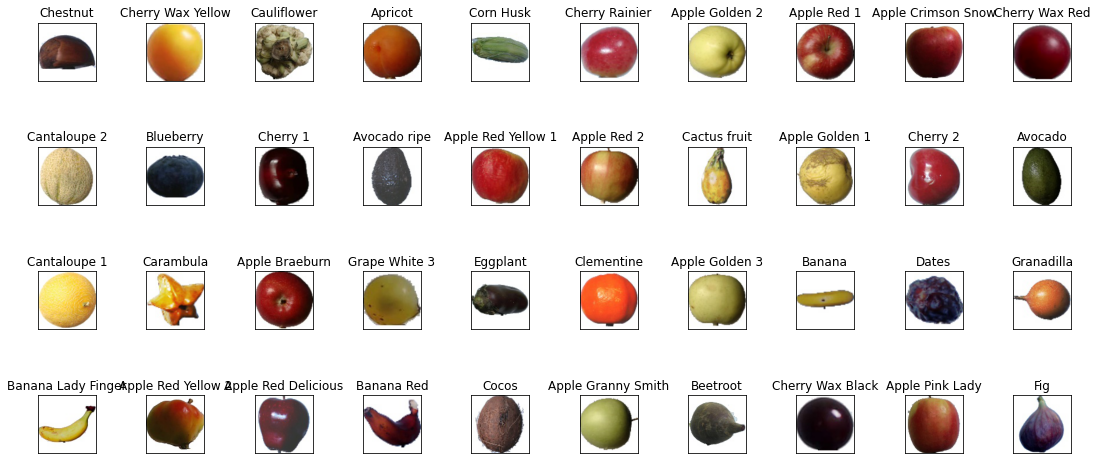

In [13]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index() #df with a Label of each category
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7), # we can see that some images of the dataset
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [14]:
from sklearn.datasets import load_files